In [13]:
import torch
import matplotlib.pyplot as plt
import time
import numpy as np

In [33]:
def boost_fault(x: torch.Tensor, group_size: int, q: torch.Tensor = None):
    max = x.abs()
    max = max.view(group_size, -1).amax(dim=(1,))
    q1, q3 = torch.quantile(max, q)
    return max.max() > q3 + 1_000 * (q3 - q1)

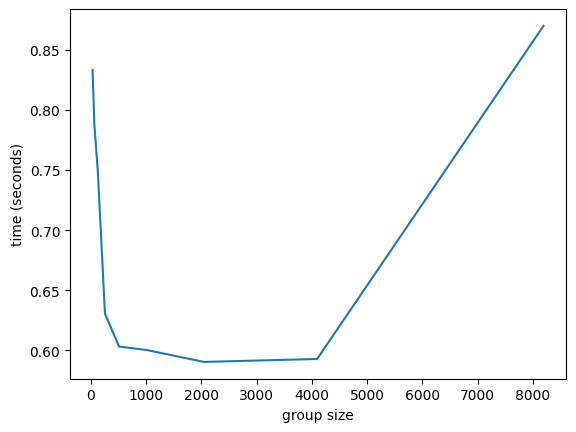

[0.7052361965179443, 0.8331239223480225, 0.7879533767700195, 0.748075008392334, 0.6306631565093994, 0.6032426357269287, 0.6003034114837646, 0.590489387512207, 0.5929334163665771, 0.8697803020477295]
[16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]


In [100]:
# # 16384 8192 4096 2048
x = torch.normal(mean=0, std=1e-9, size=(2048, 2048)).cuda()
q = torch.tensor([0.25, 0.75]).cuda()

duration= 1000
max = 16384
steps = [i for i in range(16, max) if x.numel() % i ==0]
result = []
for step in steps:
    temp = []
    start = time.time()
    for _ in range(duration):
        # start = time.time()
        boost_fault(x, step, q)
        # temp.append(time.time() - start)
    # result.append(np.mean(temp))
    result.append(time.time() - start)
    # print('calculated for step = {}'.format(step))
plt.plot(steps[1:len(steps)], result[1:len(result)])
plt.xlabel('group size')
plt.ylabel('time (seconds)')
plt.show()
print(result)
print(steps)

In [7]:
import torch
x = torch.normal(mean=0, std=1e-9, size=(10000, 10000)).cuda()
duration= 100
max = 5000
steps = [i for i in range(50, max) if x.numel() % i ==0]
print(len(steps))

25
